In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

In [8]:
movie_titles = pd.read_csv("ml-100k/u.item", sep="|", header=None, encoding='ISO-8859-1')



In [9]:
movie_titles.shape

(1682, 24)

In [10]:
movie_titles = movie_titles[[0, 1]]

In [11]:
movie_titles.columns = ['item_id', 'title']

In [12]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df =  pd.merge(df, movie_titles, on='item_id')

In [19]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [20]:
df.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [21]:
ratings =pd.DataFrame(df.groupby('title').count()['rating'].sort_values(ascending=False).head())

In [22]:
ratings.head()

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [29]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [26]:
# ratings.sort_values(by='rating', ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),583,583
Contact (1997),509,509
Fargo (1996),508,508
Return of the Jedi (1983),507,507
Liar Liar (1997),485,485


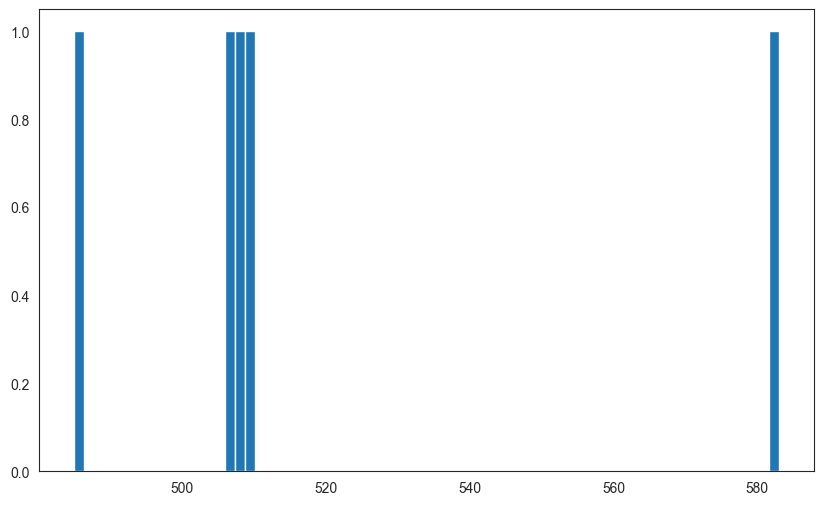

In [30]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins=70)
plt.show()

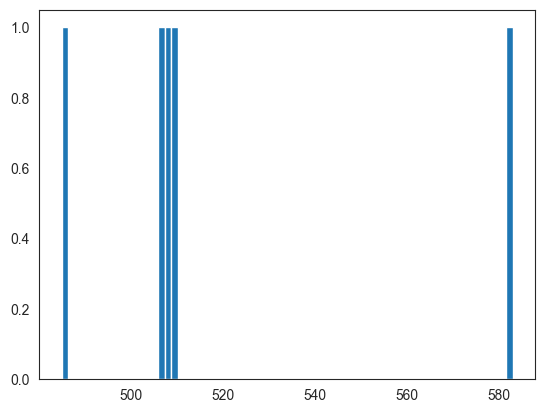

In [31]:
plt.hist(ratings['rating'], bins=70)
plt.show()

In [32]:
moviemat =  df.pivot_table(index='user_id',columns='title',values='rating')

In [33]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),583,583
Contact (1997),509,509
Fargo (1996),508,508
Return of the Jedi (1983),507,507
Liar Liar (1997),485,485


In [36]:
star_war_user_ratings = moviemat['Star Wars (1977)']
star_war_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [37]:
moviemat.corrwith(star_war_user_ratings)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [42]:
similar_to_starwars = moviemat.corrwith(star_war_user_ratings)

In [43]:
corr_starwars =  pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [44]:
corr_starwars.dropna(inplace=True)

In [46]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [47]:
ratings

,rating,num of ratings
title,,
Star Wars (1977),583,583
Contact (1997),509,509
Fargo (1996),508,508
Return of the Jedi (1983),507,507
Liar Liar (1997),485,485


In [50]:
corr_starwars[corr_starwars['Correlation'] > 0.4].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
No Escape (1994),1.000000,NaN
Cosi (1996),1.000000,NaN
Hollow Reed (1996),1.000000,NaN
Commandments (1997),1.000000,NaN
Man of the Year (1995),1.000000,NaN
...,...,...
Angel and the Badman (1947),0.408248,NaN
Ed (1996),0.408248,NaN
"Perfect Candidate, A (1996)",0.408248,NaN


In [49]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,NaN
1-900 (1994),-0.645497,NaN
101 Dalmatians (1996),0.211132,NaN
12 Angry Men (1957),0.184289,NaN
187 (1997),0.027398,NaN
